# Celdas generales

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import re
% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
data = pd.read_csv("./DATA/pal-bel-rec.csv")
data.describe()

,index_right,Unnamed: 0,ID,latitud,longitud,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,...,laundry,lavadero,balcon,terraza,sum,solarium,parrilla,a estrenar,subte,cochera
count,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3.734000e+03,3.734000e+03,3.734000e+03,3734.000000,3734.000000,...,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000
mean,18425.850295,55623.979111,55623.979111,-34.579204,-58.424537,3.638428e+05,5.911092e+06,3.350105e+05,110.372523,97.555704,...,0.115158,0.367702,0.544724,0.243974,0.140332,0.108463,0.186931,0.096144,0.177825,0.403321
std,11724.056931,33102.289060,33102.289060,0.013009,0.022621,4.593530e+05,5.494591e+06,3.114053e+05,96.395894,84.401262,...,0.319255,0.482244,0.498062,0.429535,0.347378,0.311006,0.389908,0.294827,0.382417,0.490630
min,4.000000,7.000000,7.000000,-34.599730,-58.472364,4.900000e+04,5.898837e+05,3.343159e+04,21.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8637.250000,28827.250000,28827.250000,-34.589971,-58.440293,1.490000e+05,2.558452e+06,1.450000e+05,48.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16845.500000,52038.500000,52038.500000,-34.581968,-58.423297,2.464000e+05,4.234680e+06,2.400000e+05,80.000000,71.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26667.250000,77586.250000,77586.250000,-34.567127,-58.404554,4.150000e+05,7.046772e+06,3.993750e+05,137.000000,122.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,40670.000000,121158.000000,121158.000000,-34.546880,-58.384171,9.435376e+06,5.646240e+07,3.200000e+06,967.000000,967.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#Dummies con los 3 barrios
series = data['BARRIO']
dummies = pd.get_dummies(series, prefix='BARRIO',drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.head()

,index_right,BARRIO,Unnamed: 0,ID,TIPO_PROPIEDAD,lat-lon,latitud,longitud,price,currency,...,terraza,sum,solarium,parrilla,a estrenar,subte,cochera,geometry,BARRIO_PALERMO,BARRIO_RECOLETA
0,1915,PALERMO,8196,8196,apartment,"-34.5699834561,-58.4346691662",-34.569983,-58.434669,790000.0,USD,...,1,1,1,1,0,0,1,POINT (-58.4346691662 -34.5699834561),1,0
1,17594,PALERMO,54303,54303,apartment,"-34.5711496,-58.4232966",-34.571150,-58.423297,780000.0,USD,...,0,0,0,0,0,0,0,POINT (-58.4232966 -34.57114960000001),1,0
2,16545,PALERMO,51178,51178,apartment,"-34.5693554857,-58.4333625453",-34.569355,-58.433363,245000.0,USD,...,1,0,0,1,1,0,0,POINT (-58.4333625453 -34.5693554857),1,0
3,16566,PALERMO,51215,51215,apartment,"-34.580572,-58.4400316",-34.580572,-58.440032,330000.0,USD,...,0,1,1,1,0,0,1,POINT (-58.4400316 -34.580572),1,0
4,16586,PALERMO,51315,51315,apartment,"-34.5809781,-58.4289623",-34.580978,-58.428962,125000.0,USD,...,0,0,0,0,0,1,0,POINT (-58.4289623 -34.5809781),1,0


In [4]:
data.groupby(by = 'SUBBARRIO').count()

,index_right,BARRIO,Unnamed: 0,ID,TIPO_PROPIEDAD,lat-lon,latitud,longitud,price,currency,...,terraza,sum,solarium,parrilla,a estrenar,subte,cochera,geometry,BARRIO_PALERMO,BARRIO_RECOLETA
SUBBARRIO,,,,,,,,,,,,,,,,,,,,,
Abasto,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Almagro,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Balvanera,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Barrio Norte,498,498,498,498,498,498,498,498,498,498,...,498,498,498,498,498,498,498,498,498,498
Belgrano,953,953,953,953,953,953,953,953,953,953,...,953,953,953,953,953,953,953,953,953,953
Centro / Microcentro,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Chacarita,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Coghlan,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
Colegiales,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17


In [5]:
data.columns

Index(['index_right', 'BARRIO', 'Unnamed: 0', 'ID', 'TIPO_PROPIEDAD',
       'lat-lon', 'latitud', 'longitud', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'PAIS', 'PROVINCIA', 'CIUDAD-PARTIDO', 'SUBBARRIO',
       'Ambientes', 'pileta', 'amenities', 'gimnasio', 'laundry', 'lavadero',
       'balcon', 'terraza', 'sum', 'solarium', 'parrilla', 'a estrenar',
       'subte', 'cochera', 'geometry', 'BARRIO_PALERMO', 'BARRIO_RECOLETA'],
      dtype='object')

In [6]:
data = data[(data['TIPO_PROPIEDAD'] == 'apartment')]
if data.surface_covered_in_m2.isnull:
    data.surface_covered_in_m2

In [7]:
pd.set_option('display.max_columns', 500)
data.describe()

,index_right,Unnamed: 0,ID,latitud,longitud,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Ambientes,pileta,amenities,gimnasio,laundry,lavadero,balcon,terraza,sum,solarium,parrilla,a estrenar,subte,cochera,BARRIO_PALERMO,BARRIO_RECOLETA
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3.428000e+03,3.428000e+03,3.428000e+03,3428.000000,3428.000000,3428.000000,3428.000000,236.000000,2175.000000,1142.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000
mean,18483.925613,55786.995041,55786.995041,-34.579079,-58.424132,3.509480e+05,5.670030e+06,3.213483e+05,102.427655,91.193407,3121.637500,4202.365700,4.563559,3.105747,5077.954466,3.023337,0.219953,0.144107,0.127480,0.124271,0.372229,0.574679,0.235414,0.149942,0.115811,0.180572,0.101225,0.183781,0.417736,0.455659,0.321470
std,11750.319731,33171.549589,33171.549589,0.012970,0.022738,4.438573e+05,5.091397e+06,2.885544e+05,80.521537,71.742497,783.182386,6326.541385,3.928102,1.553356,4759.016145,1.493116,0.414275,0.351250,0.333558,0.329938,0.483469,0.494464,0.424319,0.357066,0.320045,0.384719,0.301671,0.387362,0.493258,0.498103,0.467109
min,4.000000,7.000000,7.000000,-34.599730,-58.472364,5.800000e+04,5.898837e+05,3.343159e+04,21.000000,4.000000,1078.438387,1196.319018,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8620.750000,28809.750000,28809.750000,-34.589880,-58.440371,1.450000e+05,2.523164e+06,1.430000e+05,46.000000,41.000000,2590.503247,2857.142857,2.000000,2.000000,2000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17028.500000,52790.000000,52790.000000,-34.581819,-58.423297,2.400000e+05,4.181746e+06,2.370000e+05,78.000000,69.000000,3000.000000,3333.333333,4.000000,3.000000,3500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26713.750000,77747.500000,77747.500000,-34.566966,-58.404062,3.990000e+05,6.881355e+06,3.900000e+05,130.000000,117.000000,3533.521341,4048.397234,6.000000,4.000000,6500.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,40670.000000,121158.000000,121158.000000,-34.549922,-58.384171,9.435376e+06,5.646240e+07,3.200000e+06,789.000000,690.000000,5487.804878,101851.557143,22.000000,15.000000,54240.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1. Primer modelado

## 1.1. Preparación de datos

In [8]:
data_aux = data[[ 'surface_total_in_m2', 'surface_covered_in_m2' ,'Ambientes', 'pileta', 'amenities',
       'gimnasio', 'laundry', 'sum', 'solarium', 'parrilla', 'a estrenar',
       'subte', 'cochera', 'latitud', 'longitud', 'BARRIO_PALERMO', 'BARRIO_RECOLETA']]

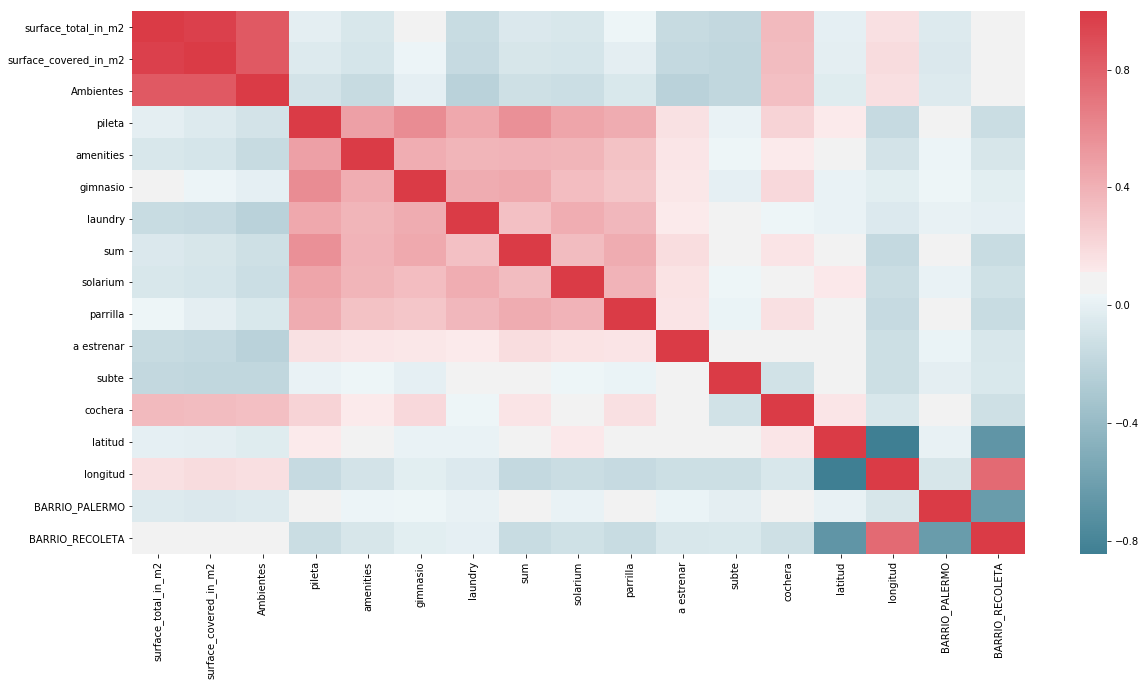

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data_aux.corr(),
            xticklabels=data_aux.columns.values,
            yticklabels=data_aux.columns.values, cmap=sns.diverging_palette(220, 10, as_cmap=True));

In [10]:
#Split train y test 
X_train, X_test, y_train, y_test = train_test_split(data_aux, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2399, 17) (2399,)
(1029, 17) (1029,)


In [11]:
# Normalización (para Ridge y Lasso)
se = StandardScaler()
X_train_s = se.fit_transform(X_train)
X_test_s = se.transform(X_test)

## 1.2.1. Regresión lineal

In [12]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print ('Regresión Mínimos Cuadrados Ordinarios')
#Coeficiente
print('Coeficientes:',regr.coef_)
# MSE 
print("Residual sum of squares: %.2f"
 % np.mean((regr.predict(X_train) - y_train) ** 2))
# Varianza explicada
print('Varianza explicada: %.2f\n' % regr.score(X_train, y_train))

Regresión Mínimos Cuadrados Ordinarios
Coeficientes: [-8.52272497e+00  8.49473940e+00  8.02429602e+00  3.72771525e+02
  1.04794720e+02  4.59431041e+02  2.14957876e+02 -6.41119638e+01
  2.48419816e+00 -4.07662319e+01  2.35257060e+02 -1.04952323e+02
  3.03576801e+02  2.60320066e+04  2.07775126e+04  1.35559312e+02
 -1.42317223e+02]
Residual sum of squares: 376435.69
Varianza explicada: 0.39



In [13]:
# Un cross validation
results = cross_val_score(regr,X_train,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

[0.37885315 0.43133843 0.31893708 0.40931892 0.33661576]
0.3750126674943426
0.042386446941523256


In [14]:
# Y probando en el test:
pred_test = regr.predict(X_test)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.36



## 1.2.2. Regresión Lasso 

In [15]:
regr2=linear_model.LassoCV(cv=10).fit(X_train_s, y_train)

print ('Regresión Lasso' )
# Alpha
print('alpha: %.2f\n' % regr2.alpha_)
# Coeficiente
print ('Coeficientes:', regr2.coef_)
# MSE
print("\nResidual sum of squares: %.2f"
 % np.mean((regr2.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('\nVarianza explicada: %.2f\n' % regr2.score(X_train_s, y_train))

Regresión Lasso
alpha: 0.72

Coeficientes: [-6.77068782e+02  5.96542546e+02  8.54477439e+00  1.54106562e+02
  3.63743506e+01  1.56305364e+02  7.21715767e+01 -2.17217500e+01
  5.14720897e-01 -1.61038162e+01  7.05521619e+01 -4.11034148e+01
  1.49183417e+02  3.34146864e+02  4.66339666e+02  6.95819404e+01
 -6.09509953e+01]

Residual sum of squares: 376481.61

Varianza explicada: 0.39



In [16]:
# Un cross validation
results = cross_val_score(regr2,X_train_s,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

[0.37895229 0.43039617 0.32013407 0.40866614 0.33907226]
0.3754441851574894
0.04127432852183314


In [17]:
# Y probando en el test:
pred_test = regr2.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.36



## 1.2.3. Regresión Ridge

In [18]:
regr3=linear_model.RidgeCV(alphas=[0.1,0.2,0.5,0.7,1.38,1.39,1.5,1.6,3.0,5.0,7.0,10.0])
regr3.fit(X_train_s,y_train)

print ('Regresión Ridge')
# Alpha
print('alpha: %.2f\n' % regr3.alpha_)
# Coeficientes
print('Coeficientes:', regr3.coef_)
# MSE
print("\nResidual sum of squares: %.2f"
 % np.mean((regr3.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('\nVarianza explicada: %.2f\n' % regr3.score(X_train_s, y_train))

Regresión Ridge
alpha: 1.60

Coeficientes: [-686.14359612  602.76911951   11.54549311  155.066795     37.11877215
  156.46685338   72.98232203  -23.16524266    0.96827447  -16.7478364
   71.68672847  -41.49327191  149.36496496  335.88425684  471.35586738
   67.8286249   -65.47635107]

Residual sum of squares: 376447.63

Varianza explicada: 0.39



In [19]:
# Un cross validation
results = cross_val_score(regr3,X_train_s,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

[0.37860941 0.43036106 0.31964939 0.40767346 0.33776823]
0.37481231106865687
0.04146118307397456


In [20]:
# Y probando en el test:
pred_test = regr3.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.36



Las 3 dieron lo mismo. Lasso no nos sacó features, podemos probar chequear la significatividad de las mismas y sacar quizás alguna

## 1.3. Eliminar features

Voy a ver qué features tienen poca significatividad y correr el modelo sin ellas a ver qué pasa

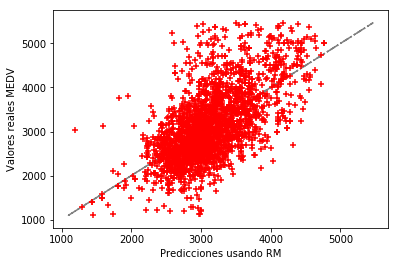

EMC: 376435.69180278224
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     89.52
Date:                Sun, 30 Sep 2018   Prob (F-statistic):          2.28e-240
Time:                        11:15:21   Log-Likelihood:                -18804.
No. Observations:                2399   AIC:                         3.764e+04
Df Residuals:                    2381   BIC:                         3.775e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const 

In [23]:
# Agregar constante
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)

# Graficamos los resultados
plt.plot(y_train,y_train, '-.', c='grey')
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y_train, predictions))
print (model.summary())

'parrilla' y 'BARRIO_RECOLETA' parecen ser las menos significativas. Nueva prueba sacándolas:

In [24]:
data_aux2 = data[[ 'surface_total_in_m2', 'surface_covered_in_m2' ,'Ambientes', 'pileta',
       'gimnasio', 'laundry', 'sum', 'solarium', 'a estrenar',
       'subte', 'cochera', 'latitud', 'longitud', 'BARRIO_PALERMO']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_aux2, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2399, 14) (2399,)
(1029, 14) (1029,)


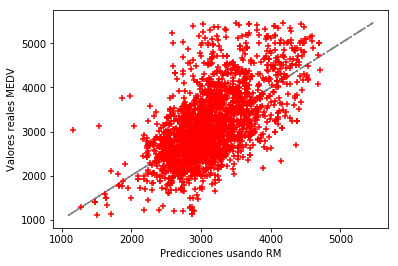

EMC: 377807.0720594601
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     107.8
Date:                Sun, 30 Sep 2018   Prob (F-statistic):          1.55e-241
Time:                        11:15:29   Log-Likelihood:                -18808.
No. Observations:                2399   AIC:                         3.765e+04
Df Residuals:                    2384   BIC:                         3.773e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const  

In [26]:
# Agregar constante
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)

# Graficamos los resultados
plt.plot(y_train,y_train, '-.', c='grey')
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y_train, predictions))
print (model.summary())

El R2 y el R2 ajustado empeoran ligeramente, probando en el test:

In [27]:
pred_test = model.predict(X_test)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.36



No cambia... 'carajo, mierda!'

## 1.4. Análisis de errores

In [28]:
# Los mayores errores proporcionalmente se dan al sobrevaluar propiedades baratas

data_e = X_train
data_e['error'] = y_train - predictions
data_e['error_abs'] = np.abs(y_train - predictions)
data_e['precioxm2'] = y_train
data_e['pred'] = predictions
data_e['error_prop'] = data_e['error'] / data_e['precioxm2']
data_e['error_prop_abs'] = data_e['error_abs'] / data_e['precioxm2']
data_e.sort_values(by='error_prop_abs',ascending=False).head(20)

,const,surface_total_in_m2,surface_covered_in_m2,Ambientes,pileta,gimnasio,laundry,sum,solarium,a estrenar,subte,cochera,latitud,longitud,BARRIO_PALERMO,error,error_abs,precioxm2,pred,error_prop,error_prop_abs
1302,1.0,31.0,24.0,1,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1759.340494,1759.340494,1115.873226,2875.213720,-1.576649,1.576649
1300,1.0,38.0,30.0,1,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1738.234521,1738.234521,1128.345789,2866.580311,-1.540516,1.540516
1294,1.0,37.0,32.0,1,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1690.143689,1690.143689,1202.374865,2892.518554,-1.405671,1.405671
1304,1.0,31.0,25.0,1,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1661.403015,1661.403015,1222.457419,2883.860435,-1.359068,1.359068
2092,1.0,326.0,326.0,6,0,0,0,0,0,0,0,0,-34.561882,-58.454043,0,-1540.736718,1540.736718,1196.319018,2737.055736,-1.287898,1.287898
1305,1.0,33.0,25.0,2,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1593.100707,1593.100707,1279.387576,2872.488283,-1.245206,1.245206
1299,1.0,47.0,36.0,2,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1578.074324,1578.074324,1268.500426,2846.574750,-1.244047,1.244047
1297,1.0,47.0,36.0,2,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1561.993686,1561.993686,1284.581064,2846.574750,-1.215956,1.215956
482,1.0,80.0,19.0,1,0,0,1,0,1,0,0,0,-34.574907,-58.435853,1,-1425.582514,1425.582514,1187.500000,2613.082514,-1.200491,1.200491
2329,1.0,187.0,187.0,5,0,0,0,0,0,0,0,1,-34.564858,-58.454128,0,-1479.767446,1479.767446,1470.588235,2950.355681,-1.006242,1.006242


In [29]:
data_e.sort_values(by='error_abs',ascending=False).head(20)

,const,surface_total_in_m2,surface_covered_in_m2,Ambientes,pileta,gimnasio,laundry,sum,solarium,a estrenar,subte,cochera,latitud,longitud,BARRIO_PALERMO,error,error_abs,precioxm2,pred,error_prop,error_prop_abs
1420,1.0,61.0,58.0,2,0,0,0,0,0,0,0,0,-34.589410,-58.431334,1,2662.765350,2662.765350,5245.901639,2583.136289,0.507590,0.507590
84,1.0,529.0,431.0,8,0,0,0,0,0,0,0,1,-34.583042,-58.400016,1,2501.367749,2501.367749,5387.523629,2886.155880,0.464289,0.464289
661,1.0,115.0,110.0,3,0,0,0,0,0,0,0,0,-34.577166,-58.425303,1,2408.218221,2408.218221,5434.782609,3026.564388,0.443112,0.443112
1737,1.0,74.0,67.0,3,0,0,0,0,0,0,0,0,-34.562084,-58.456686,0,2398.725102,2398.725102,5000.000000,2601.274898,0.479745,0.479745
1742,1.0,114.0,105.0,4,0,0,0,0,0,0,0,0,-34.555357,-58.458188,0,2297.759598,2297.759598,5043.859649,2746.100051,0.455556,0.455556
632,1.0,56.0,51.0,2,0,0,0,0,0,0,0,0,-34.577761,-58.424323,1,2244.639951,2244.639951,5267.857143,3023.217192,0.426101,0.426101
631,1.0,114.0,100.0,4,0,0,0,0,1,0,0,0,-34.577777,-58.424300,1,2205.953497,2205.953497,5175.438596,2969.485100,0.426235,0.426235
2890,1.0,330.0,300.0,6,0,0,0,0,0,0,0,1,-34.589546,-58.397364,0,2181.372167,2181.372167,5303.030303,3121.658136,0.411344,0.411344
2823,1.0,110.0,100.0,4,0,0,0,0,0,0,0,0,-34.588583,-58.387745,0,2170.728806,2170.728806,5363.636364,3192.907557,0.404712,0.404712
200,1.0,130.0,130.0,4,0,0,0,0,0,0,0,0,-34.563342,-58.436630,1,2148.403691,2148.403691,5384.615385,3236.211694,0.398989,0.398989


In [30]:
data_e.describe()

,const,surface_total_in_m2,surface_covered_in_m2,Ambientes,pileta,gimnasio,laundry,sum,solarium,a estrenar,subte,cochera,latitud,longitud,BARRIO_PALERMO,error,error_abs,precioxm2,pred,error_prop,error_prop_abs
count,2399.0,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2.399000e+03,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000
mean,1.0,102.491038,90.738641,3.011672,0.223426,0.134223,0.132138,0.155065,0.117549,0.104210,0.192163,0.409754,-34.579077,-58.424129,0.451855,1.309968e-09,468.331615,3120.518690,3120.518690,-0.039795,0.158020
std,0.0,82.043601,72.416289,1.496963,0.416629,0.340962,0.338712,0.362042,0.322140,0.305597,0.394083,0.491891,0.012964,0.022798,0.497780,6.147883e+02,398.169129,785.685402,489.220736,0.215536,0.151853
min,1.0,21.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.599730,-58.472364,0.000000,-1.818912e+03,0.078030,1098.039216,1161.654504,-1.576649,0.000027
25%,1.0,46.000000,41.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.589884,-58.440513,0.000000,-3.968371e+02,169.919161,2583.333333,2813.167701,-0.150656,0.055678
50%,1.0,78.000000,68.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.581687,-58.423297,0.000000,-5.380355e+01,376.074566,2997.777778,3059.680708,-0.019368,0.121589
75%,1.0,130.000000,116.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-34.567018,-58.404019,1.000000,3.433305e+02,644.259263,3530.323529,3377.978990,0.101394,0.214176
max,1.0,789.000000,690.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-34.549922,-58.384275,1.000000,2.662765e+03,2662.765350,5466.666667,4713.650614,0.618314,1.576649


No handles with labels found to put in legend.


Text(0.5,1,'Histograma')

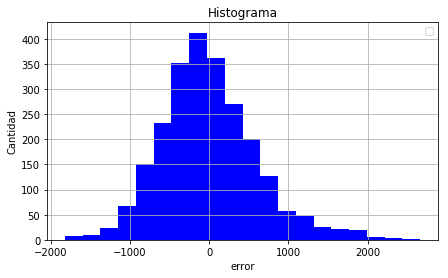

In [31]:
plt.figure(figsize=(7, 4))
plt.hist(data_e.error,color = 'b', bins=20)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('error')
plt.ylabel('Cantidad')
plt.title('Histograma')

No handles with labels found to put in legend.


Text(0.5,1,'Histograma')

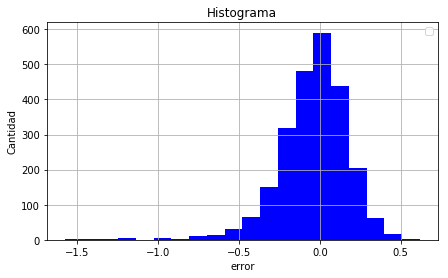

In [32]:
plt.figure(figsize=(7, 4))
plt.hist(data_e.error_prop,color = 'b', bins=20)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('error')
plt.ylabel('Cantidad')
plt.title('Histograma')

Los errores parecen ser mayores en términos absolutos subvaluando propiedades más caras, pero en términos relativos se sobrevalúa propiedades más baratas. Por lo general son casos con pocas dummies (muchos 'ceros'), pero no parece haber motivos para sacarlas. Lo ideal sería tener más features.

# 2. Segundo modelado con Polynomial Features

## 2.1. Creando Polynomial features  

In [33]:
data_aux

,surface_total_in_m2,surface_covered_in_m2,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera,latitud,longitud,BARRIO_PALERMO,BARRIO_RECOLETA
0,185.0,103.0,5,1,0,1,1,1,1,1,0,0,1,-34.569983,-58.434669,1,0
1,185.0,185.0,5,0,0,0,0,0,0,0,0,0,0,-34.571150,-58.423297,1,0
2,84.0,70.0,3,0,1,1,0,0,0,1,1,0,0,-34.569355,-58.433363,1,0
3,77.0,68.0,4,1,1,0,0,1,1,1,0,0,1,-34.580572,-58.440032,1,0
4,58.0,58.0,3,0,0,0,0,0,0,0,0,1,0,-34.580978,-58.428962,1,0
5,145.0,124.0,4,0,0,0,0,0,0,0,0,0,1,-34.567161,-58.433130,1,0
7,104.0,96.0,4,0,0,0,0,0,0,0,0,0,0,-34.580504,-58.405874,1,0
8,120.0,120.0,4,0,0,0,0,0,0,0,0,0,0,-34.581538,-58.415915,1,0
9,54.0,45.0,2,0,0,0,0,0,0,0,0,0,0,-34.571150,-58.423297,1,0
10,175.0,90.0,5,1,1,1,0,1,1,1,0,1,1,-34.584294,-58.436469,1,0


In [34]:
data_aux_sq = PolynomialFeatures(2,include_bias=True,interaction_only=False).fit_transform(data_aux)

In [35]:
data_aux_sq.shape

(3428, 171)

In [36]:
#Split train y test 
X_train, X_test, y_train, y_test = train_test_split(data_aux_sq, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2399, 171) (2399,)
(1029, 171) (1029,)


In [37]:
# Normalización (para Ridge y Lasso)
se = StandardScaler()
X_train_s = se.fit_transform(X_train)
X_test_s = se.transform(X_test)

In [38]:
prueba = pd.DataFrame(data_aux_sq)
prueba.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170
0,1.0,185.0,103.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,34225.0,19055.0,925.0,185.0,0.0,185.0,185.0,185.0,185.0,185.0,0.0,0.0,185.0,-6395.446939,-10810.413796,185.0,0.0,10609.0,515.0,103.0,0.0,103.0,103.0,103.0,103.0,103.0,0.0,0.0,103.0,-3560.708296,-6018.770924,103.0,0.0,25.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,5.0,-172.849917,-292.173346,5.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1195.083756,2020.085546,-34.569983,-0.0,3414.610561,-58.434669,-0.0,1.0,0.0,0.0
1,1.0,185.0,185.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34.571150,-58.423297,1.0,0.0,34225.0,34225.0,925.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6395.662676,-10808.309871,185.0,0.0,34225.0,925.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6395.662676,-10808.309871,185.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-172.855748,-292.116483,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1195.164385,2019.760527,-34.571150,-0.0,3413.281586,-58.423297,-0.0,1.0,0.0,0.0
2,1.0,84.0,70.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,7056.0,5880.0,252.0,0.0,84.0,84.0,0.0,0.0,0.0,84.0,84.0,0.0,0.0,-2903.825861,-4908.402454,84.0,0.0,4900.0,210.0,0.0,70.0,70.0,0.0,0.0,0.0,70.0,70.0,0.0,0.0,-2419.854884,-4090.335378,70.0,0.0,9.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,-103.708066,-175.300088,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1195.040339,2020.003682,-34.569355,-0.0,3414.457858,-58.433363,-0.0,1.0,0.0,0.0
3,1.0,77.0,68.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.580572,-58.440032,1.0,0.0,5929.0,5236.0,308.0,77.0,77.0,0.0,0.0,77.0,77.0,77.0,0.0,0.0,77.0,-2662.704044,-4499.882433,77.0,0.0,4624.0,272.0,68.0,68.0,0.0,0.0,68.0,68.0,68.0,0.0,0.0,68.0,-2351.478896,-3973.922149,68.0,0.0,16.0,4.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,-138.322288,-233.760126,4.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.580572,-58.440032,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.580572,-58.440032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0

Perdí todos los nombres de columnas... No sé cómo gadorchas tenerlos

## 2.2.1. Regresión lineal

In [39]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print ('Regresión Mínimos Cuadrados Ordinarios')
#Coeficiente
print('Coeficientes:',regr.coef_)
# MSE 
print("Residual sum of squares: %.2f"
 % np.mean((regr.predict(X_train) - y_train) ** 2))
# Varianza explicada
print('Varianza explicada: %.2f\n' % regr.score(X_train, y_train))

Regresión Mínimos Cuadrados Ordinarios
Coeficientes: [-2.39846499e+01 -2.46414393e+04  1.92916004e+04  2.46820541e+05
 -3.78690036e+05  7.39693628e+05  1.99521614e+05  1.16301798e+05
  4.12631391e+05 -1.63397681e+05 -1.70140175e+05  4.96215342e+05
 -3.49106721e+05  3.17708655e+05  4.66475941e+07  7.98050046e+07
 -1.91674746e+04 -2.04392997e+05  1.50716793e-02 -6.29425555e-03
  1.24907139e+00 -5.70441092e+00 -2.43781447e+00  5.05646423e+00
 -4.15864149e+00  1.97936097e+00  4.28108296e+00  1.70970703e+00
 -3.04442053e+00 -3.07027350e+00 -1.70119347e+00 -3.12611172e+02
 -2.36395305e+02  4.21975457e-01  4.35458229e+00 -1.45455398e-02
 -1.24814369e-01  1.06951886e+01  2.08686364e+00 -8.23836750e+00
  9.60639637e+00 -3.89955049e+00 -7.64359581e+00 -6.23967323e+00
  5.20889131e+00  1.47725822e-01  1.94962753e+00  2.53403620e+02
  1.79949797e+02  2.71608228e+00 -3.16222765e+00 -3.58402200e+01
 -1.86986773e+02  5.96228930e+01  1.58534770e+02  5.79393847e+00
  7.73156271e+01  2.04077991e+02  7.0

In [40]:
# Un cross validation
results = cross_val_score(regr,X_train,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

[0.36486097 0.48000469 0.31956727 0.41279438 0.37396097]
0.3902376538780348
0.05379616376578437


In [41]:
# Y probando en el test:
pred_test = regr.predict(X_test)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.40



## 2.2.2. Regresión Lasso 

In [42]:
regr2=linear_model.LassoCV(cv=5).fit(X_train_s, y_train)

print ('Regresión Lasso' )
# Alpha
print('alpha: %.2f\n' % regr2.alpha_)
# Coeficiente
print ('Coeficientes:', regr2.coef_)
# MSE
print("\nResidual sum of squares: %.2f"
 % np.mean((regr2.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('\nVarianza explicada: %.2f\n' % regr2.score(X_train_s, y_train))

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

Regresión Lasso
alpha: 2.41

Coeficientes: [ 0.00000000e+00 -3.72768929e+02  1.91190714e+02 -0.00000000e+00
  0.00000000e+00  3.40533020e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.56597633e+00  1.36827382e+01
 -2.89665358e+00  7.12520050e+01 -0.00000000e+00  1.03766505e+02
  5.93209572e+00 -4.19344869e+01  1.17741575e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.74310340e+01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -6.66204814e+01 -0.00000000e+00  3.02858666e+02
  4.06150225e+00 -9.80514710e+01 -5.83477037e+01 -0.00000000e+00
  0.00000000e+00  2.64475200e+01  0.00000000e+00 -0.00000000e+00
  7.99231016e+01  0.00000000e+00 -9.58459876e+01 -1.13915807e+02
  5.52666604e+01 -0.00000000e+00  8.11850773e+01 -2.81070853e+02
 -0.00000000e+00  1.45784054e+02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  7.66646245e+01  2.24741664e+01  1.61612951e+01
  1.89837020e+01  1.53164997e+02  0.00000000e+0

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [73]:
results = cross_val_score(regr2,X_train_s,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

[0.39391073 0.46382384 0.37754854 0.42620613 0.39982551]
0.41226294964874627
0.030164621997500897


C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [43]:
# Y probando en el test:
pred_test = regr2.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.41



## 2.2.3 Regresión Ridge 

In [44]:
regr3=linear_model.RidgeCV(alphas=[0.1,0.2,0.5,0.7,1.38,1.39,1.5,1.6,3.0,5.0,7.0,10.0, 18.9, 19.0, 50.0])
regr3.fit(X_train_s,y_train)

print ('Regresión Ridge')
# Alpha
print('alpha: %.2f\n' % regr3.alpha_)
# Coeficientes
print('Coeficientes:', regr3.coef_)
# MSE
print("\nResidual sum of squares: %.2f"
 % np.mean((regr3.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('\nVarianza explicada: %.2f\n' % regr3.score(X_train_s, y_train))

Regresión Ridge
alpha: 10.00

Coeficientes: [   0.         -278.05216119  196.28531804   -2.48766762   33.65918017
   20.57767675  -13.06705613   -7.4362738    -2.01282758    2.69362881
    0.42519241    9.15066647  -12.97385695   25.14920725    9.71296999
   82.2580479    -0.73387932  -17.69306139  234.63043831  -15.18944983
  204.46713073  -15.51221059 -187.93904159   51.21877264  -86.9603419
  -17.92488624   78.31373478   72.79750473  -43.07859899  -83.78797269
  -98.59098684  277.03148322  279.21020237 -213.67046646  -92.8607651
 -233.89264204   82.45318304  171.24508141  128.9626677  -116.06954074
  214.7754621    -5.94901889 -201.01318239 -238.15170356   94.90233107
  -44.31235389  136.90817538 -197.16836663 -194.9784052   274.16603052
   37.92786431 -106.20000209 -161.66979721  103.74667062  115.43745082
    6.12607282   37.52586795  194.25075056   45.09051006   -7.74421589
   98.55539533   -8.23871235    1.64904127    3.85922798  -18.48028924
  -21.33502272   33.65918017   15.1

In [45]:
results = cross_val_score(regr3,X_train_s,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

[0.39297735 0.46355559 0.3495934  0.44056704 0.38360877]
0.4060604305996865
0.04089051075388417


In [46]:
# Y probando en el test:
pred_test = regr3.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.41



La Lasso y la Ridge dieron mejor, y la Lasso además eliminó varias variables, nos quedaríamos con esa. Ya se veía que había overfitting en el cross validation de la regresión común y silvestre

## 2.4. Análisis de errores

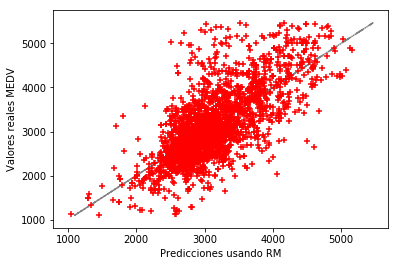

EMC: 303079.91043343436
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     14.79
Date:                Sun, 30 Sep 2018   Prob (F-statistic):          5.00e-246
Time:                        11:16:41   Log-Likelihood:                -18544.
No. Observations:                2399   AIC:                         3.740e+04
Df Residuals:                    2241   BIC:                         3.832e+04
Df Model:                         157                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.139e+09   1.14

C:\Users\juan\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\juan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\juan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\juan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [47]:
# Agregar constante
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)

# Graficamos los resultados
plt.plot(y_train,y_train, '-.', c='grey')
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y_train, predictions))
print (model.summary())

In [48]:
pred_test = model.predict(X_test)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.40



In [49]:
# Los mayores errores proporcionalmente se dan al sobrevaluar propiedades baratas

data_e = pd.DataFrame(X_train)
data_e['error'] = y_train - predictions
data_e['error_abs'] = np.abs(y_train - predictions)
data_e['precioxm2'] = y_train
data_e['pred'] = predictions
data_e['error_prop'] = data_e['error'] / data_e['precioxm2']
data_e['error_prop_abs'] = data_e['error_abs'] / data_e['precioxm2']
data_e.sort_values(by='error_prop_abs',ascending=False).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,error,error_abs,precioxm2,pred,error_prop,error_prop_abs
1302,1.0,40.0,36.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-34.563127,-58.462991,0.0,0.0,1600.0,1440.0,40.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,-1382.525068,-2338.519628,0.0,0.0,1296.0,36.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,-1244.272561,-2104.667665,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-34.563127,-58.462991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-34.563127,-58.462991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1194.609727,2020.663755,-0.000000,-0.000000,3417.921282,-0.000000,-0.000000,0.0,0.0,0.0,-1468.938917,1468.938917,1115.873226,2513.869238,-1.316403,1.316403
1300,1.0,99.0,99.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34.587337,-58.415642,1.0,0.0,9801.0,9801.0,396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3424.146412,-5783.148538,99.0,0.0,9801.0,396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3424.146412,-5783.148538,99.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-138.349350,-233.662567,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1196.283915,2020.441518,-34.587337,-0.000000,3412.387207,-58.415642,-0.000000,1.0,0.0,0.0,-1440.535512,1440.535512,1128.345789,2941.626515,-1.276679,1.276679
1305,1.0,360.0,360.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-34.576666,-58.402930,1.0,0.0,129600.0,129600.0,2520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,360.0,-12447.599688,-21025.054620,360.0,0.0,129600.0,2520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,360.0,-12447.599688,-21025.054620,360.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,-242.036661,-408.820507,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,-34.576666,-58.402930,1.0,0.0,1195.545818,2019.378575,-34.576666,-0.000000,3410.902174,-58.402930,-0.000000,1.0,0.0,0.0,-1537.706625,1537.706625,1279.387576,4497.665157,-1.201908,1.201908
1294,1.0,35.0,32.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-34.555819,-58.448435,0.0,0.0,1225.0,1120.0,35.0,0.0,0.0,35.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,-1209.453676,-2045.695218,0.0,0.0,1024.0,32.0,0.0,0.0,32.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,-1105.786218,-1870.349914,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-34.555819,-58.448435,0.0,0.

In [50]:
data_e.sort_values(by='error_abs',ascending=False).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,error,error_abs,precioxm2,pred,error_prop,error_prop_abs
1420,1.0,111.0,81.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-34.582680,-58.434648,1.0,0.0,12321.0,8991.0,222.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,0.0,0.0,-3838.677524,-6486.245884,111.0,0.0,6561.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,0.0,0.0,0.0,-2801.197112,-4733.206456,81.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-69.165361,-116.869295,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,0.0,0.0,0.0,-34.582680,-58.434648,1.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1195.961784,2020.826742,-34.582680,-0.000000,3414.608040,-58.434648,-0.000000,1.0,0.0,0.0,2551.377525,2551.377525,5245.901639,2361.338368,0.486356,0.486356
1742,1.0,193.0,160.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-34.588309,-58.411826,1.0,0.0,37249.0,30880.0,772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,193.0,-6675.543705,-11273.482432,193.0,0.0,25600.0,640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,160.0,-5534.129497,-9345.892171,160.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,-138.353237,-233.647304,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,-34.588309,-58.411826,1.0,0.0,1.0,-34.588309,-58.411826,1.0,0.0,1196.351144,2020.366310,-34.588309,-0.000000,3411.941425,-58.411826,-0.000000,1.0,0.0,0.0,2530.188734,2530.188734,5043.859649,2528.482493,0.501637,0.501637
661,1.0,75.0,68.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-34.571150,-58.423297,1.0,0.0,5625.0,5100.0,150.0,75.0,0.0,75.0,75.0,0.0,0.0,75.0,75.0,75.0,75.0,-2592.836220,-4381.747245,75.0,0.0,4624.0,136.0,68.0,0.0,68.0,68.0,0.0,0.0,68.0,68.0,68.0,68.0,-2350.838173,-3972.784169,68.0,0.0,4.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,-69.142299,-116.846593,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-34.571150,-58.423297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-34.571150,-58.423297,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-34.571150,-58.423297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,1.0,1.0,-34.571150,-58.423297,1.0,0.0,1.0,1.0,1.0,-34.571150,-58.423297,1.0,0.0,1.0,1.0,-34.571150,-58.423297,1.0,0.0,1.0,-34.571150,-58.423297,1.0,0.0,1195.164385,2019.760527,-34.571150,-0.000000,3413.281586,-58.423297,-0.000000,1.0,0.0,0.0,2413.291646,2413.291646,5434.782609,5075.453823,0.444046,0.444046
1737,1.0,113.0,94.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-34.556865,-58.447706,0.0,0.0,12769.0,10622.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,-3904.925725,-6604.590828,0.0,0.0,8836.0,376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,-3248.345293,-5494.084406,0.0,0.0,16.0,0.0,0

In [51]:
data_e.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,error,error_abs,precioxm2,pred,error_prop,error_prop_abs
count,2399.0,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.0,2399.000000,1524.000000,1524.000000,1524.000000,2399.000000,1524.000000,1524.000000
mean,1.0,102.491038,90.738641,3.011672,0.223426,0.147145,0.134223,0.132138,0.155065,0.117549,0.186328,0.104210,0.192163,0.409754,-34.579077,-58.424129,0.451855,0.321384,17232.759483,15027.423093,411.901626,22.246353,13.496040,15.132138,9.323468,14.364735,10.305127,20.187578,6.779491,14.102960,56.269696,-3544.049278,-5987.652729,44.937891,36.102126,13475.433931,364.163401,18.937474,11.430179,12.912047,8.029179,12.107962,8.698624,16.211338,5.783660,12.202168,49.566903,-3137.676340,-5301.019066,39.250104,32.691538,11.310129,0.608587,0.367653,0.404335,0.283035,0.400167,0.293456,0.515215,0.208837,0.461859,1.472280,-104.141198,-175.948647,1.330554,1.031263,0.223426,0.107962,0.117132,0.096707,0.122551,0.090454,0.113381,0.042935,0.048770,0.138391,-7.725268,-13.054991,0.116715,0.044602,0.147145,0.073781,0.067111,0.073781,0.061276,0.073781,0.029596,0.035848,0.081701,-5.087788,-8.597554,0.072113,0.035431,0.134223,0.067528,0.075448,0.053356,0.064193,0.027095,0.027928,0.090871,-4.641206,-7.842005,0.067111,0.040434,0.132138,0.062109,0.061692,0.074614,0.027095,0.039183,0.059608,-4.569180,-7.720440,0.061276,0.042101,0.155065,0.055857,0.085452,0.035431,0.040017,0.090038,-5.361515,-9.060980,0.081701,0.025427,0.117549,0.070446,0.025844,0.028345,0.

Los errores parecen ser seguir la misma distribución...

# 3. Volvemos a la limpieza a buscar más datos

## 3.1. Agregando columnas y creando Polynomial features  

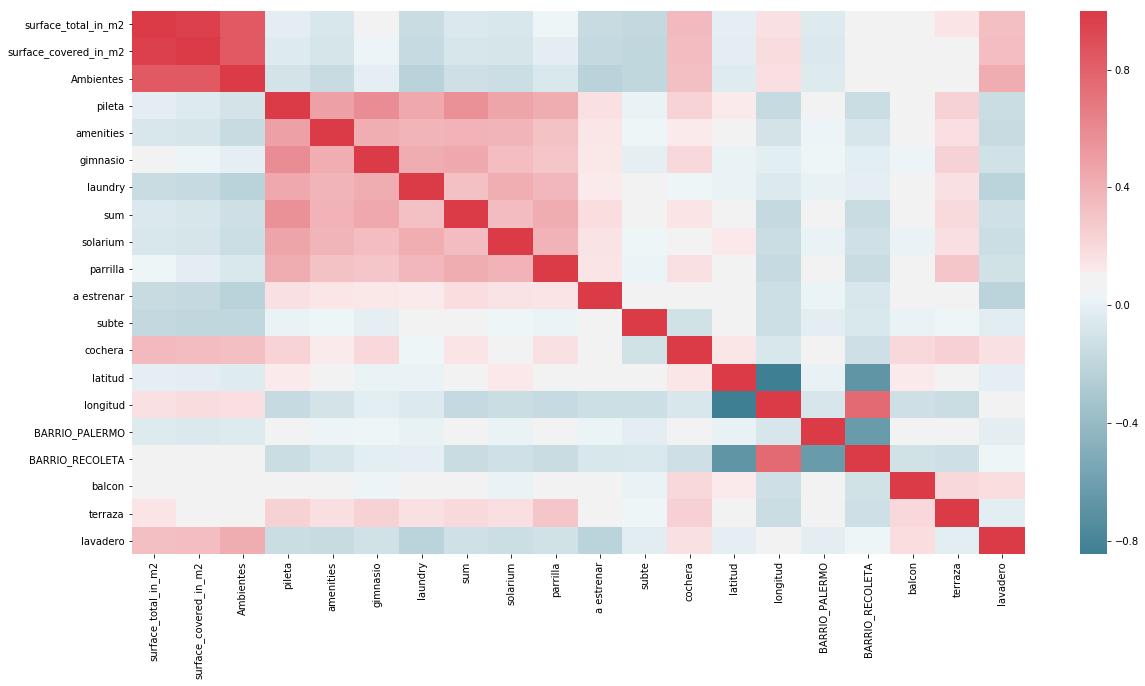

In [56]:
data_aux3 = data[[ 'surface_total_in_m2', 'surface_covered_in_m2' ,'Ambientes', 'pileta', 'amenities',
       'gimnasio', 'laundry', 'sum', 'solarium', 'parrilla', 'a estrenar',
       'subte', 'cochera', 'latitud', 'longitud', 'BARRIO_PALERMO', 'BARRIO_RECOLETA', 'balcon', 'terraza', 'lavadero']]

plt.figure(figsize=(20,10))
sns.heatmap(data_aux3.corr(),
            xticklabels=data_aux3.columns.values,
            yticklabels=data_aux3.columns.values, cmap=sns.diverging_palette(220, 10, as_cmap=True));

In [60]:
data_aux3_sq = PolynomialFeatures(2,include_bias=True,interaction_only=False).fit_transform(data_aux3)

In [61]:
data_aux3_sq.shape

(3428, 231)

In [62]:
#Split train y test 
X_train, X_test, y_train, y_test = train_test_split(data_aux3_sq, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2399, 231) (2399,)
(1029, 231) (1029,)


In [63]:
# Normalización (para Ridge y Lasso)
se = StandardScaler()
X_train_s = se.fit_transform(X_train)
X_test_s = se.transform(X_test)

In [64]:
prueba = pd.DataFrame(data_aux_sq)
prueba.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170
0,1.0,185.0,103.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,34225.0,19055.0,925.0,185.0,0.0,185.0,185.0,185.0,185.0,185.0,0.0,0.0,185.0,-6395.446939,-10810.413796,185.0,0.0,10609.0,515.0,103.0,0.0,103.0,103.0,103.0,103.0,103.0,0.0,0.0,103.0,-3560.708296,-6018.770924,103.0,0.0,25.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,5.0,-172.849917,-292.173346,5.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1195.083756,2020.085546,-34.569983,-0.0,3414.610561,-58.434669,-0.0,1.0,0.0,0.0
1,1.0,185.0,185.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34.571150,-58.423297,1.0,0.0,34225.0,34225.0,925.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6395.662676,-10808.309871,185.0,0.0,34225.0,925.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6395.662676,-10808.309871,185.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-172.855748,-292.116483,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1195.164385,2019.760527,-34.571150,-0.0,3413.281586,-58.423297,-0.0,1.0,0.0,0.0
2,1.0,84.0,70.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,7056.0,5880.0,252.0,0.0,84.0,84.0,0.0,0.0,0.0,84.0,84.0,0.0,0.0,-2903.825861,-4908.402454,84.0,0.0,4900.0,210.0,0.0,70.0,70.0,0.0,0.0,0.0,70.0,70.0,0.0,0.0,-2419.854884,-4090.335378,70.0,0.0,9.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,-103.708066,-175.300088,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1195.040339,2020.003682,-34.569355,-0.0,3414.457858,-58.433363,-0.0,1.0,0.0,0.0
3,1.0,77.0,68.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.580572,-58.440032,1.0,0.0,5929.0,5236.0,308.0,77.0,77.0,0.0,0.0,77.0,77.0,77.0,0.0,0.0,77.0,-2662.704044,-4499.882433,77.0,0.0,4624.0,272.0,68.0,68.0,0.0,0.0,68.0,68.0,68.0,0.0,0.0,68.0,-2351.478896,-3973.922149,68.0,0.0,16.0,4.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,-138.322288,-233.760126,4.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.580572,-58.440032,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.580572,-58.440032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0

## 3.2.1. Regresión lineal

In [65]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print ('Regresión Mínimos Cuadrados Ordinarios')
#Coeficiente
print('Coeficientes:',regr.coef_)
# MSE 
print("Residual sum of squares: %.2f"
 % np.mean((regr.predict(X_train) - y_train) ** 2))
# Varianza explicada
print('Varianza explicada: %.2f\n' % regr.score(X_train, y_train))

Regresión Mínimos Cuadrados Ordinarios
Coeficientes: [-2.81545477e+01 -1.56250151e+04  9.61558959e+03  2.74999183e+05
 -3.05614078e+05  7.12603129e+05  2.76660028e+05  8.15881975e+04
  3.44754347e+05 -2.63881971e+05 -1.27787096e+05  5.14673814e+05
 -3.89607134e+05  2.49855155e+05  4.59919622e+07  7.87223909e+07
  1.03260500e+04 -1.32613769e+05  1.66116100e+05 -2.25178925e+04
  6.55037893e+04  3.69393761e-02 -5.54460267e-02  1.13758550e+00
 -5.05278666e+00 -5.38462598e-01  6.13387630e-01 -3.73019349e+00
  1.73625647e+00  2.13490378e+00  1.49012104e+00 -5.54667097e-01
 -2.96863586e+00 -4.68989306e+00 -2.22305110e+02 -1.35473083e+02
  2.63607534e-01  2.23566290e+00  3.91208500e+00  3.98984447e+00
  2.68043064e+00  1.20291095e-02 -7.42181713e-02  9.61844539e+00
 -3.71607673e-01 -3.86820405e+00  1.01153526e+01 -3.30091785e+00
 -4.39636528e+00 -6.35319612e+00  4.32392962e+00  3.54367972e-01
  5.15105292e+00  1.32187533e+02  8.60303563e+01  2.11161893e+00
 -1.85747017e+00 -4.39515841e+00 -2.9

In [66]:
# Un cross validation
results = cross_val_score(regr,X_train,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

[0.30875459 0.46591692 0.30074101 0.41087186 0.34738976]
0.36673482870217866
0.06304964603105218


In [67]:
# Y probando en el test:
pred_test = regr.predict(X_test)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.41



## 3.2.2. Regresión Lasso 

In [68]:
regr2=linear_model.LassoCV(cv=5).fit(X_train_s, y_train)

print ('Regresión Lasso' )
# Alpha
print('alpha: %.2f\n' % regr2.alpha_)
# Coeficiente
print ('Coeficientes:', regr2.coef_)
# MSE
print("\nResidual sum of squares: %.2f"
 % np.mean((regr2.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('\nVarianza explicada: %.2f\n' % regr2.score(X_train_s, y_train))

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

Regresión Lasso
alpha: 3.18

Coeficientes: [ 0.00000000e+00 -3.46894442e+02  1.67716236e+02  0.00000000e+00
  1.93142674e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  9.10567213e-01  1.51916783e-02
 -7.52878170e+00  8.19989339e+01 -0.00000000e+00  8.90469066e+01
  1.69964390e+01 -3.16244679e+01  1.20424875e+01 -0.00000000e+00
 -1.44448510e+01  6.04581488e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.92253414e+01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -8.76386532e+01 -0.00000000e+00  2.34193591e+02  4.00491809e+00
 -4.19069255e+01 -4.97820189e+01 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.68084043e+00  1.00889966e+00
  0.00000000e+00 -0.00000000e+00  5.64950038e+01 -0.00000000e+00
 -4.74065866e+01 -8.91589920e+01  5.81632079e+01 -0.00000000e+00
  7.28563637e+01 -2.33009827e+02 -0.00000000e+00  1.06498542e+02
 -0.00000000e+00  0.00000000e+00  1.26282403e+0

In [73]:
results = cross_val_score(regr2,X_train_s,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

[0.39391073 0.46382384 0.37754854 0.42620613 0.39982551]
0.41226294964874627
0.030164621997500897


C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [69]:
# Y probando en el test:
pred_test = regr2.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.42



## 3.2.3. Regresión Ridge 

In [70]:
regr3=linear_model.RidgeCV(alphas=[0.1,0.2,0.5,0.7,1.38,1.39,1.5,1.6,3.0,5.0,7.0,10.0, 18.9, 19.0, 50.0])
regr3.fit(X_train_s,y_train)

print ('Regresión Ridge')
# Alpha
print('alpha: %.2f\n' % regr3.alpha_)
# Coeficientes
print('Coeficientes:', regr3.coef_)
# MSE
print("\nResidual sum of squares: %.2f"
 % np.mean((regr3.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('\nVarianza explicada: %.2f\n' % regr3.score(X_train_s, y_train))

Regresión Ridge
alpha: 50.00

Coeficientes: [ 0.00000000e+00 -1.75262428e+02  1.03561918e+02  3.11983791e+00
  3.70272274e+01  7.16621609e+00 -6.78057380e+00 -1.03705923e+01
 -9.26044748e+00  4.34753140e+00  4.62757187e+00  5.38763127e+00
 -1.28820765e+01  3.04255953e+01  1.16694333e+01  7.84165766e+01
 -1.61495088e-01 -1.84317129e+01  8.40189951e+00 -1.93724588e+01
 -2.81046522e+01  4.44511781e+01  1.73306051e+01  2.88846727e+01
 -7.84687636e+00 -7.41320527e+01 -3.59674428e+01 -4.34584363e+01
 -1.45573827e+01 -1.59056968e+00 -4.03900873e+01 -1.25006463e+01
 -7.39412389e+01 -4.41929209e+01  1.75085456e+02  1.75572549e+02
 -1.02374087e+02 -6.10967635e+01 -1.67532123e+01  3.96789761e+01
  2.60551055e+01 -2.68920997e+01  6.60022916e+01  6.23725942e+01
  4.88302679e+01 -1.10062564e+01  1.15562446e+02 -1.54102878e+01
 -6.61761084e+01 -8.47329048e+01  7.34987615e+01 -3.89794385e+01
  8.04326655e+01 -1.03734131e+02 -1.03253575e+02  1.47774706e+02
  9.70070026e+00  6.59609084e+00  2.01618348e+

In [71]:
results = cross_val_score(regr3,X_train_s,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

[0.37593558 0.46644322 0.35984814 0.44168607 0.36086809]
0.4009562202037202
0.044430693054203566


In [72]:
# Y probando en el test:
pred_test = regr3.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.42



Mejoré un punto! La Lasso y la Ridge dieron mejor, y la Lasso además eliminó varias variables, nos quedaríamos con esa. Ya se veía que había overfitting en el cross validation de la regresión común y silvestre

# 4. Una locura: Polynomial features de grado 3!

## 4.1. Preparando los datos

In [74]:
data_aux3_cu = PolynomialFeatures(3,include_bias=True,interaction_only=False).fit_transform(data_aux3)

In [75]:
data_aux3_cu.shape

(3428, 1771)

In [82]:
#Split train y test 
X_train, X_test, y_train, y_test = train_test_split(data_aux3_cu, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2399, 1771) (2399,)
(1029, 1771) (1029,)


In [83]:
# Normalización (para Ridge y Lasso)
se = StandardScaler()
X_train_s = se.fit_transform(X_train)
X_test_s = se.transform(X_test)

In [84]:
prueba = pd.DataFrame(data_aux_sq)
prueba.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170
0,1.0,185.0,103.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,34225.0,19055.0,925.0,185.0,0.0,185.0,185.0,185.0,185.0,185.0,0.0,0.0,185.0,-6395.446939,-10810.413796,185.0,0.0,10609.0,515.0,103.0,0.0,103.0,103.0,103.0,103.0,103.0,0.0,0.0,103.0,-3560.708296,-6018.770924,103.0,0.0,25.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,5.0,-172.849917,-292.173346,5.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1.0,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,-34.569983,-58.434669,1.0,0.0,1195.083756,2020.085546,-34.569983,-0.0,3414.610561,-58.434669,-0.0,1.0,0.0,0.0
1,1.0,185.0,185.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34.571150,-58.423297,1.0,0.0,34225.0,34225.0,925.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6395.662676,-10808.309871,185.0,0.0,34225.0,925.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6395.662676,-10808.309871,185.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-172.855748,-292.116483,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1195.164385,2019.760527,-34.571150,-0.0,3413.281586,-58.423297,-0.0,1.0,0.0,0.0
2,1.0,84.0,70.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,7056.0,5880.0,252.0,0.0,84.0,84.0,0.0,0.0,0.0,84.0,84.0,0.0,0.0,-2903.825861,-4908.402454,84.0,0.0,4900.0,210.0,0.0,70.0,70.0,0.0,0.0,0.0,70.0,70.0,0.0,0.0,-2419.854884,-4090.335378,70.0,0.0,9.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,-103.708066,-175.300088,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,1.0,0.0,0.0,-34.569355,-58.433363,1.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,1195.040339,2020.003682,-34.569355,-0.0,3414.457858,-58.433363,-0.0,1.0,0.0,0.0
3,1.0,77.0,68.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.580572,-58.440032,1.0,0.0,5929.0,5236.0,308.0,77.0,77.0,0.0,0.0,77.0,77.0,77.0,0.0,0.0,77.0,-2662.704044,-4499.882433,77.0,0.0,4624.0,272.0,68.0,68.0,0.0,0.0,68.0,68.0,68.0,0.0,0.0,68.0,-2351.478896,-3973.922149,68.0,0.0,16.0,4.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,-138.322288,-233.760126,4.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.580572,-58.440032,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-34.580572,-58.440032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0

## 4.2.1. Regresión Lineal

In [85]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print ('Regresión Mínimos Cuadrados Ordinarios')
#Coeficiente
print('Coeficientes:',regr.coef_)
# MSE 
print("Residual sum of squares: %.2f"
 % np.mean((regr.predict(X_train) - y_train) ** 2))
# Varianza explicada
print('Varianza explicada: %.2f\n' % regr.score(X_train, y_train))

Regresión Mínimos Cuadrados Ordinarios
Coeficientes: [ 9.03496544e+02 -1.31564837e+08  1.79444664e+08 ... -7.56027512e+04
 -7.56027488e+04  6.75610976e+05]
Residual sum of squares: 128581.68
Varianza explicada: 0.79



In [87]:
# Un cross validation
results = cross_val_score(regr,X_train,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

[-1.36506132e+07 -1.07509023e+04 -3.37104494e+05 -4.34729146e+04
 -1.83179648e+05]
-2845024.231417031
5404028.608203273


In [88]:
# Y probando en el test:
pred_test = regr.predict(X_test)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): -153309.59



Overfitting in extremus! Veamos si con Lasso se corriege o explota:

## 4.2.2. Regresión Lasso 

In [89]:
regr2=linear_model.LassoCV(cv=5).fit(X_train_s, y_train)

print ('Regresión Lasso' )
# Alpha
print('alpha: %.2f\n' % regr2.alpha_)
# Coeficiente
print ('Coeficientes:', regr2.coef_)
# MSE
print("\nResidual sum of squares: %.2f"
 % np.mean((regr2.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('\nVarianza explicada: %.2f\n' % regr2.score(X_train_s, y_train))

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

Regresión Lasso
alpha: 5.96

Coeficientes: [   0.         -161.59017392   78.97953644 ...    0.            0.
   -0.        ]

Residual sum of squares: 302022.99

Varianza explicada: 0.51



In [73]:
results = cross_val_score(regr2,X_train_s,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

[0.39391073 0.46382384 0.37754854 0.42620613 0.39982551]
0.41226294964874627
0.030164621997500897


C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [90]:
# Y probando en el test:
pred_test = regr2.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.41



## 4.2.3. Regresión Ridge 

In [91]:
regr3=linear_model.RidgeCV(alphas=[0.1,0.2,0.5,0.7,1.38,1.39,1.5,1.6,3.0,5.0,7.0,10.0, 18.9, 19.0, 50.0])
regr3.fit(X_train_s,y_train)

print ('Regresión Ridge')
# Alpha
print('alpha: %.2f\n' % regr3.alpha_)
# Coeficientes
print('Coeficientes:', regr3.coef_)
# MSE
print("\nResidual sum of squares: %.2f"
 % np.mean((regr3.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('\nVarianza explicada: %.2f\n' % regr3.score(X_train_s, y_train))

Regresión Ridge
alpha: 50.00

Coeficientes: [  0.         -89.77451789  56.2179769  ...  10.23830451  10.23830451
  -6.92606984]

Residual sum of squares: 222350.10

Varianza explicada: 0.64



In [92]:
results = cross_val_score(regr3,X_train_s,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

[0.33597855 0.41873889 0.27115219 0.35205225 0.31334043]
0.3382524605497097
0.048573089847588076


In [93]:
# Y probando en el test:
pred_test = regr3.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.32



Explota todo y termina dando peor. Afuera!

# 5. Análisis de la muestra de 100 casos

## 5.1. La que elegimos fue la segunda regresión Lasso

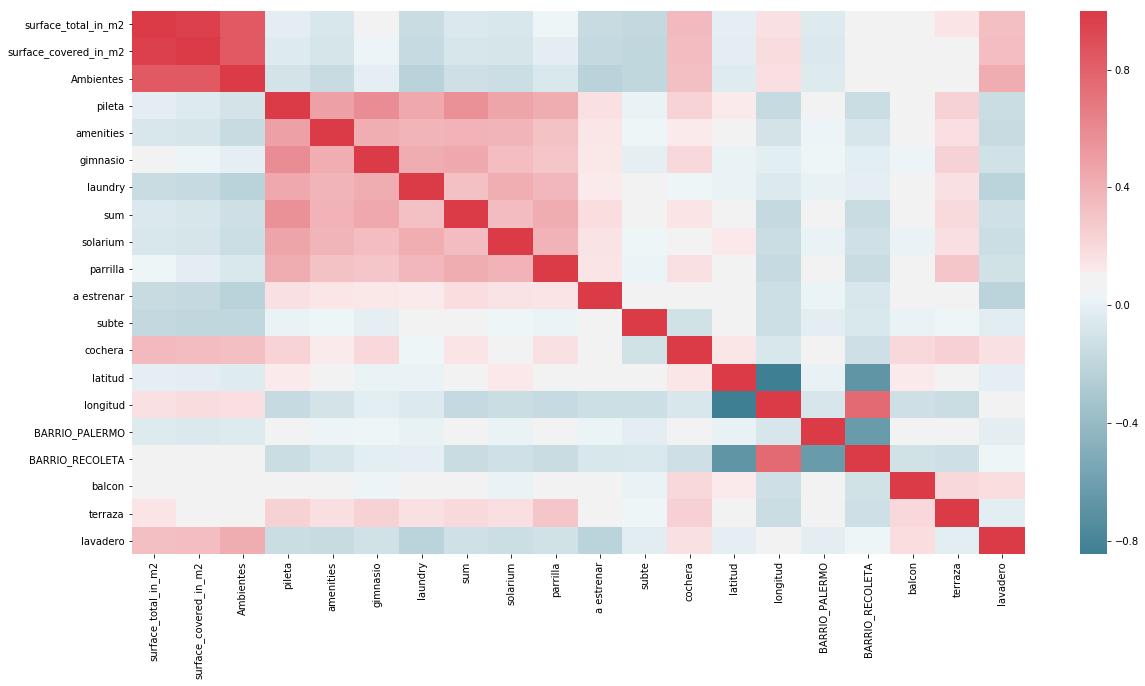

In [94]:
data_aux3 = data[[ 'surface_total_in_m2', 'surface_covered_in_m2' ,'Ambientes', 'pileta', 'amenities',
       'gimnasio', 'laundry', 'sum', 'solarium', 'parrilla', 'a estrenar',
       'subte', 'cochera', 'latitud', 'longitud', 'BARRIO_PALERMO', 'BARRIO_RECOLETA', 'balcon', 'terraza', 'lavadero']]

plt.figure(figsize=(20,10))
sns.heatmap(data_aux3.corr(),
            xticklabels=data_aux3.columns.values,
            yticklabels=data_aux3.columns.values, cmap=sns.diverging_palette(220, 10, as_cmap=True));

In [95]:
data_aux3_sq = PolynomialFeatures(2,include_bias=True,interaction_only=False).fit_transform(data_aux3)

In [96]:
data_aux3_sq.shape

(3428, 231)

In [97]:
#Split train y test 
X_train, X_test, y_train, y_test = train_test_split(data_aux3_sq, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2399, 231) (2399,)
(1029, 231) (1029,)


In [98]:
# Normalización (para Ridge y Lasso)
se = StandardScaler()
X_train_s = se.fit_transform(X_train)
X_test_s = se.transform(X_test)

In [99]:
regr2=linear_model.LassoCV(cv=5).fit(X_train_s, y_train)

print ('Regresión Lasso' )
# Alpha
print('alpha: %.2f\n' % regr2.alpha_)
# Coeficiente
print ('Coeficientes:', regr2.coef_)
# MSE
print("\nResidual sum of squares: %.2f"
 % np.mean((regr2.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('\nVarianza explicada: %.2f\n' % regr2.score(X_train_s, y_train))

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

Regresión Lasso
alpha: 3.18

Coeficientes: [ 0.00000000e+00 -3.46894442e+02  1.67716236e+02  0.00000000e+00
  1.93142674e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  9.10567213e-01  1.51916783e-02
 -7.52878170e+00  8.19989339e+01 -0.00000000e+00  8.90469066e+01
  1.69964390e+01 -3.16244679e+01  1.20424875e+01 -0.00000000e+00
 -1.44448510e+01  6.04581488e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.92253414e+01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -8.76386532e+01 -0.00000000e+00  2.34193591e+02  4.00491809e+00
 -4.19069255e+01 -4.97820189e+01 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.68084043e+00  1.00889966e+00
  0.00000000e+00 -0.00000000e+00  5.64950038e+01 -0.00000000e+00
 -4.74065866e+01 -8.91589920e+01  5.81632079e+01 -0.00000000e+00
  7.28563637e+01 -2.33009827e+02 -0.00000000e+00  1.06498542e+02
 -0.00000000e+00  0.00000000e+00  1.26282403e+0

In [100]:
results = cross_val_score(regr2,X_train_s,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

[0.39391073 0.46382384 0.37754854 0.42620613 0.39982551]
0.41226294964874627
0.030164621997500897


C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [101]:
# Y probando en el test:
pred_test = regr2.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.42



## 5.2 Tomamos la muestra, la pasamos por el modelo y la graficamos

In [123]:
muestra = pd.DataFrame(dict(precio_x_m2_real = y_test, precio_x_m2_predicho = pred_test)).sample(100)
muestra.head()

,precio_x_m2_real,precio_x_m2_predicho
1185,3250.000000,2846.438843
244,4500.000000,3791.545843
2014,2547.222222,2584.659616
2159,2966.666667,2600.587566
1121,3277.310924,3240.860387


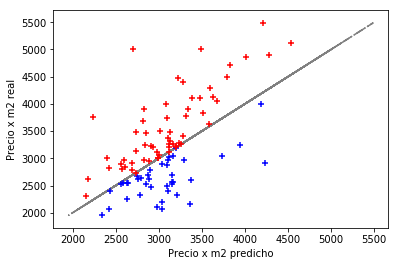

Rojo = Vender
Azul = Comprar


In [128]:
# Graficamos los resultados
plt.plot(muestra.precio_x_m2_real, muestra.precio_x_m2_real, '-.', c='grey')
plt.scatter(muestra.precio_x_m2_predicho[muestra.precio_x_m2_predicho > muestra.precio_x_m2_real]
            , muestra.precio_x_m2_real[muestra.precio_x_m2_predicho > muestra.precio_x_m2_real]
            , s=30, c='b', marker='+', zorder=10)
plt.scatter(muestra.precio_x_m2_predicho[muestra.precio_x_m2_predicho < muestra.precio_x_m2_real]
            , muestra.precio_x_m2_real[muestra.precio_x_m2_predicho < muestra.precio_x_m2_real]
            , s=30, c='r', marker='+', zorder=10)
plt.xlabel("Precio x m2 predicho")
plt.ylabel("Precio x m2 real")
plt.show()

print('Rojo = Vender\nAzul = Comprar')